In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# RET

In [2]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 53.4 MB/s eta 0:00:00


In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

def draw_molecule(smiles: str, size=(300, 300)) -> SVG:
    """
    Draws a molecule from a SMILES string using RDKit.

    Parameters:
        smiles (str): SMILES string of the molecule.
        size (tuple): Image size in pixels (width, height).

    Returns:
        SVG: An SVG image of the molecule.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("Invalid SMILES string")

    # Compute 2D coordinates
    Chem.rdDepictor.Compute2DCoords(mol)

    # Create drawer
    drawer = rdMolDraw2D.MolDraw2DSVG(size[0], size[1])
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()

    svg = drawer.GetDrawingText()
    return SVG(svg)


In [8]:
cdk2_3fwq = ['CC(=O)N[C@H]1[C@@H](O[C@H]2[C@H](O)[C@@H](NC(C)=O)CO[C@@H]2O)O[C@H](CO)[C@@H](O)[C@@H]1O', 'CC(=O)N[C@H]1[C@H](O[C@H]2[C@H](O)[C@@H](NC(C)=O)CO[C@@H]2O)O[C@H](CO)[C@@H](O)[C@@H]1O', 'CC(=O)N[C@H]1[C@H](O[C@H]2[C@H](O)[C@@H](NC(C)=O)CO[C@@H]2CO)O[C@H](CO)[C@@H](O)O[C@@H]1O','CC(=O)N[C@H]1[C@H](O[C@H](O)[C@H](NC(=O)O)O[C@@H](NC(=O)NC)O)O[C@@H](CO)O[C@@H](CN)O[C@@H]1O', 'CC(=O)N[C@@H]1[C@@H](O)[C@H](O)[C@@H](CO)O[C@H](CO)O[C@@H]1O', 'CC(=O)N[C@H]1[C@@H](O)[C@H](O)[C@@H](CO)O[C@@H](CO)O[C@@H](O)O[C@H](CO)O[C@@H](O)[C@@H]1O', 'CC(=O)N[C@+]1[C@H](O[C@H]2[C@H](O)[C@@H](NC(C)=O)CO[C@@H]2CO)O[C@@H](CO)[C@@H](CO)O[C@@H]1O']

## 3fwq

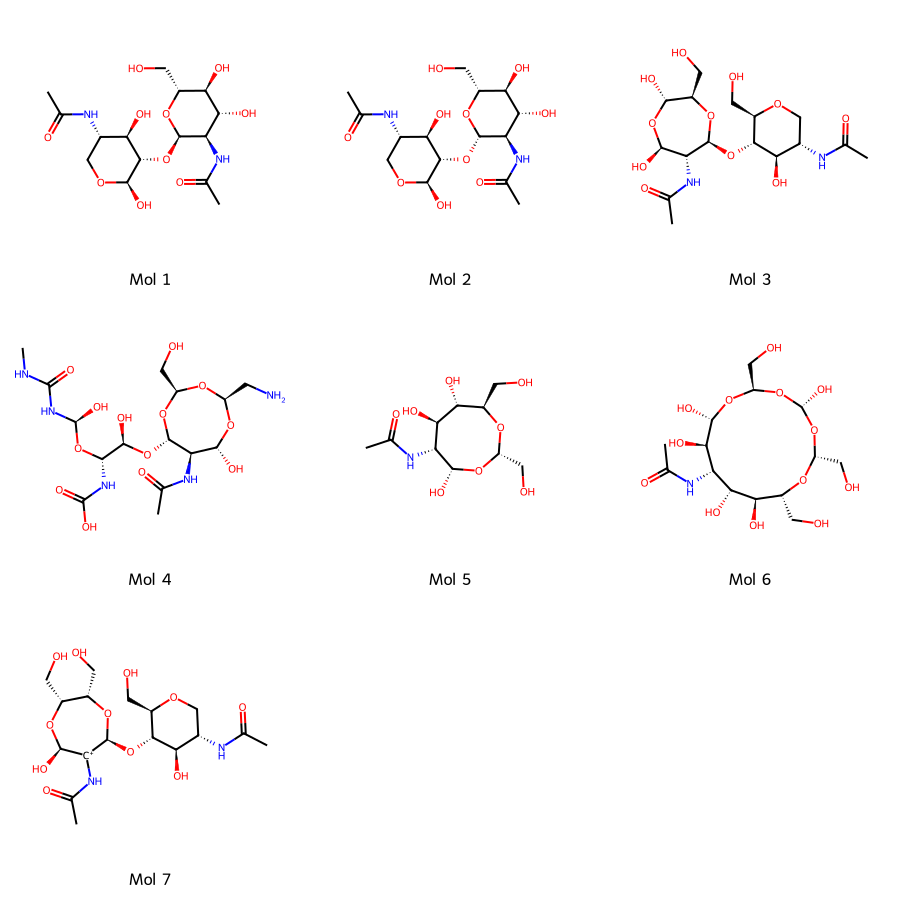

In [19]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import SVG

# List of SMILES strings
cdk2_3fwq = [
    'CC(=O)N[C@H]1[C@@H](O[C@H]2[C@H](O)[C@@H](NC(C)=O)CO[C@@H]2O)O[C@H](CO)[C@@H](O)[C@@H]1O',
    'CC(=O)N[C@H]1[C@H](O[C@H]2[C@H](O)[C@@H](NC(C)=O)CO[C@@H]2O)O[C@H](CO)[C@@H](O)[C@@H]1O',
    'CC(=O)N[C@H]1[C@H](O[C@H]2[C@H](O)[C@@H](NC(C)=O)CO[C@@H]2CO)O[C@H](CO)[C@@H](O)O[C@@H]1O',
    'CC(=O)N[C@H]1[C@H](O[C@H](O)[C@H](NC(=O)O)O[C@@H](NC(=O)NC)O)O[C@@H](CO)O[C@@H](CN)O[C@@H]1O',
    'CC(=O)N[C@@H]1[C@@H](O)[C@H](O)[C@@H](CO)O[C@H](CO)O[C@@H]1O',
    'CC(=O)N[C@H]1[C@@H](O)[C@H](O)[C@@H](CO)O[C@@H](CO)O[C@@H](O)O[C@H](CO)O[C@@H](O)[C@@H]1O',
    'CC(=O)N[C@+]1[C@H](O[C@H]2[C@H](O)[C@@H](NC(C)=O)CO[C@@H]2CO)O[C@@H](CO)[C@@H](CO)O[C@@H]1O'
]

# Convert SMILES to RDKit Mol objects
mols = [Chem.MolFromSmiles(smiles) for smiles in cdk2_3fwq]

# Compute 2D coordinates for each molecule
for mol in mols:
    if mol:
        Chem.rdDepictor.Compute2DCoords(mol)

# Create a grid image of all molecules
img = Draw.MolsToGridImage(
    mols,
    molsPerRow=3,
    subImgSize=(300, 300),
    legends=[f"Mol {i+1}" for i in range(len(mols))]
)

# Display the image
img


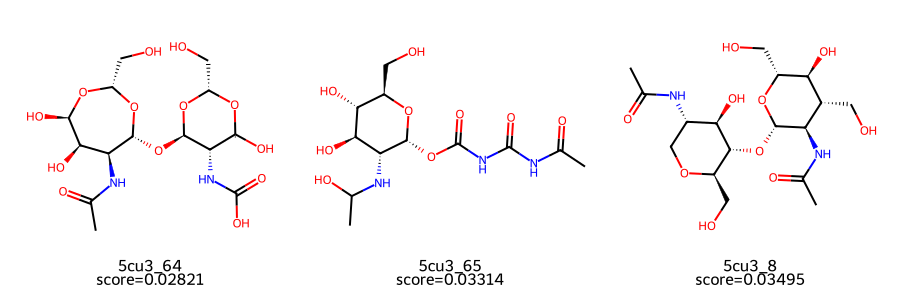

In [20]:
from rdkit import Chem
from rdkit.Chem import Draw

# Define the data as (ID, Score, SMILES)
data = [
    ("5cu3_64", 0.028214352, "CC(=O)N[C@@H]1[C@@H](O[C@H]2O[C@H](CO)O[C@@](O)[C@@H]2NC(=O)O)O[C@@H](CO)O[C@H](O)[C@@H]1O"),
    ("5cu3_65", 0.03314262, "CC(O)N[C@@H]1[C@@H](O)[C@H](O)[C@@H](CO)O[C@@H]1OC(=O)NC(=O)NC(C)=O"),
    ("5cu3_8", 0.03494869, "CC(=O)N[C@H]1[C@H](O[C@H]2[C@H](O)[C@@H](NC(C)=O)CO[C@@H]2CO)O[C@H](CO)[C@@H](O)[C@@H]1CO")
]

# Convert SMILES to Mol objects
mols = []
legends = []
for mol_id, score, smiles in data:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        Chem.rdDepictor.Compute2DCoords(mol)
        mols.append(mol)
        legends.append(f"{mol_id}\nscore={score:.5f}")

# Draw all molecules in a grid
img = Draw.MolsToGridImage(
    mols,
    molsPerRow=3,
    subImgSize=(300, 300),
    legends=legends
)

img


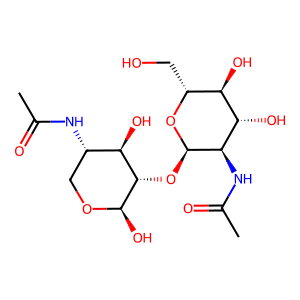

In [5]:
draw_molecule("CC(=O)N[C@H]1[C@@H](O[C@H]2[C@H](O)[C@@H](NC(C)=O)CO[C@@H]2O)O[C@H](CO)[C@@H](O)[C@@H]1O") #2ivs_84

In [18]:
for i in cdk2_3fwq:
  print(i)
  d = draw_molecule(i)
  d

CC(=O)N[C@H]1[C@@H](O[C@H]2[C@H](O)[C@@H](NC(C)=O)CO[C@@H]2O)O[C@H](CO)[C@@H](O)[C@@H]1O
CC(=O)N[C@H]1[C@H](O[C@H]2[C@H](O)[C@@H](NC(C)=O)CO[C@@H]2O)O[C@H](CO)[C@@H](O)[C@@H]1O
CC(=O)N[C@H]1[C@H](O[C@H]2[C@H](O)[C@@H](NC(C)=O)CO[C@@H]2CO)O[C@H](CO)[C@@H](O)O[C@@H]1O
CC(=O)N[C@H]1[C@H](O[C@H](O)[C@H](NC(=O)O)O[C@@H](NC(=O)NC)O)O[C@@H](CO)O[C@@H](CN)O[C@@H]1O
CC(=O)N[C@@H]1[C@@H](O)[C@H](O)[C@@H](CO)O[C@H](CO)O[C@@H]1O
CC(=O)N[C@H]1[C@@H](O)[C@H](O)[C@@H](CO)O[C@@H](CO)O[C@@H](O)O[C@H](CO)O[C@@H](O)[C@@H]1O
CC(=O)N[C@+]1[C@H](O[C@H]2[C@H](O)[C@@H](NC(C)=O)CO[C@@H]2CO)O[C@@H](CO)[C@@H](CO)O[C@@H]1O


##7ju5

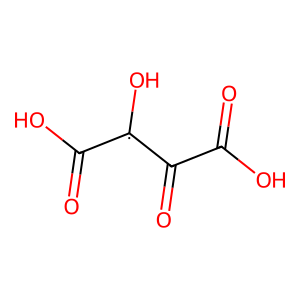

In [ ]:
draw_molecule("O=C(O)[C@@](O)C(=O)C(=O)O")

In [4]:
import pandas as pd
import io
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG, display # Import display for Jupyter/IPython environments

def select_top_10_confident_binding_sites(data: str) -> pd.DataFrame:
    """
    Selects the top 10 most confident binding sites for each site type
    from a given dataset.

    Args:
        data (str): A string containing the dataset in CSV format.

    Returns:
        pd.DataFrame: A DataFrame containing the top 10 most confident
                      binding sites for each site type.
    """
    df = pd.read_csv(io.StringIO(data))
    df['conf_x'] = pd.to_numeric(df['conf_x'], errors='coerce')
    df.dropna(subset=['conf_x'], inplace=True)
    df_sorted = df.sort_values(by=['site_type_x', 'conf_x'], ascending=[True, False])
    top_10_per_site_type = df_sorted.groupby('site_type_x').head(10).reset_index(drop=True)
    return top_10_per_site_type

def plot_top_smiles_grid(dataframe: pd.DataFrame):
    """
    Plots a grid of the top 10 SMILES strings for each site type
    from the provided DataFrame.

    Args:
        dataframe (pd.DataFrame): A DataFrame containing the top 10 most confident
                                  binding sites, including 'smiles_x' and 'site_type_x'.
    """
    for site_type, group in dataframe.groupby('site_type_x'):
        smiles_list = group['smiles_x'].tolist()
        protein_ids = group['protein_id'].tolist()
        confidences = group['conf_x'].tolist()

        mols = []
        legends = []
        for i, smiles in enumerate(smiles_list):
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                Chem.rdDepictor.Compute2DCoords(mol)
                mols.append(mol)
                legends.append(f"Protein: {protein_ids[i]}\nConf: {confidences[i]:.2f}")
            else:
                print(f"Warning: Could not parse SMILES for {protein_ids[i]}: {smiles}")

        if mols:
            print(f"\n--- Top 10 Molecules for Site Type: {site_type} ---")
            # Create a grid image of all molecules
            img = Draw.MolsToGridImage(
                mols,
                molsPerRow=5,  # Adjust as needed
                subImgSize=(250, 250), # Smaller images for better fit
                legends=legends
            )
            display(img)
        else:
            print(f"\nNo valid molecules to display for Site Type: {site_type}")

In [14]:

def select_top_10_confident_binding_sites(df: pd.DataFrame) -> pd.DataFrame:
    """
    Selects the top 10 most confident binding sites for each site type
    from a given DataFrame.

    Args:
        df (pd.DataFrame): A DataFrame containing the binding site data.
                           Expected columns include 'conf_x' and 'site_type_x'.

    Returns:
        pd.DataFrame: A DataFrame containing the top 10 most confident
                      binding sites for each site type.
    """
    # Ensure 'conf_x' is numeric, coercing errors to NaN
    df['conf_x'] = pd.to_numeric(df['conf_x'], errors='coerce')

    # Drop rows where 'conf_x' is NaN after conversion
    df.dropna(subset=['conf_x'], inplace=True)

    # Sort by 'site_type_x' and 'conf_x' in descending order
    df_sorted = df.sort_values(by=['site_type_x', 'conf_x'], ascending=[True, False])

    # Group by 'site_type_x' and select the top 10 for each group
    top_10_per_site_type = df_sorted.groupby('site_type_x').head(10).reset_index(drop=True)

    return top_10_per_site_type

def plot_top_smiles_grid(dataframe: pd.DataFrame):
    """
    Plots a grid of the top 10 SMILES strings for each site type
    from the provided DataFrame.

    Args:
        dataframe (pd.DataFrame): A DataFrame containing the top 10 most confident
                                  binding sites, including 'smiles_x' and 'site_type_x'.
    """
    for site_type, group in dataframe.groupby('site_type_x'):
        smiles_list = group['smiles_x'].tolist()
        protein_ids = group['protein_id'].tolist()
        confidences = group['conf_x'].tolist()

        mols = []
        legends = []
        for i, smiles in enumerate(smiles_list):
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                Chem.rdDepictor.Compute2DCoords(mol)
                mols.append(mol)
                legends.append(f"Protein: {protein_ids[i]}") #\nConf: {confidences[i]:.2f}
            else:
                print(f"Warning: Could not parse SMILES for protein_id {protein_ids[i]}: {smiles}")

        if mols:
            print(f"\n--- Top Molecules for Site Type: {site_type} ---")
            # Create a grid image of all molecules
            img = Draw.MolsToGridImage(
                mols,
                molsPerRow=5,  # Adjust as needed, e.g., 5 molecules per row
                subImgSize=(250, 250), # Smaller images for better fit
                legends=legends
            )
            display(img)
        else:
            print(f"\nNo valid molecules to display for Site Type: {site_type}")



In [12]:
import os

def select_top_10_confident_binding_sites(df: pd.DataFrame) -> pd.DataFrame:
    """
    Selects the top 10 most confident binding sites for each site type
    from a given DataFrame.

    Args:
        df (pd.DataFrame): A DataFrame containing the binding site data.
                           Expected columns include 'conf_x' and 'site_type_x'.

    Returns:
        pd.DataFrame: A DataFrame containing the top 10 most confident
                      binding sites for each site type.
    """
    # Ensure 'conf_x' is numeric, coercing errors to NaN
    df['conf_x'] = pd.to_numeric(df['conf_x'], errors='coerce')

    # Drop rows where 'conf_x' is NaN after conversion
    df.dropna(subset=['conf_x'], inplace=True)

    # Sort by 'site_type_x' and 'conf_x' in descending order
    df_sorted = df.sort_values(by=['site_type_x', 'conf_x'], ascending=[True, False])

    # Group by 'site_type_x' and select the top 10 for each group
    top_10_per_site_type = df_sorted.groupby('site_type_x').head(10).reset_index(drop=True)

    return top_10_per_site_type

def plot_top_smiles_grid(dataframe: pd.DataFrame, output_dir: str = 'molecule_grids'):
    """
    Plots a grid of the top SMILES strings for each site type
    from the provided DataFrame and saves them as image files.

    Args:
        dataframe (pd.DataFrame): A DataFrame containing the top most confident
                                  binding sites, including 'smiles_x' and 'site_type_x'.
        output_dir (str): Directory to save the generated image files.
    """
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    for site_type, group in dataframe.groupby('site_type_x'):
        smiles_list = group['smiles_x'].tolist()
        protein_ids = group['protein_id'].tolist()
        confidences = group['conf_x'].tolist()

        mols = []
        legends = []
        for i, smiles in enumerate(smiles_list):
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                # Compute 2D coordinates for the molecule
                Chem.rdDepictor.Compute2DCoords(mol)
                mols.append(mol)
                # You can choose to include confidence in the legend if desired, but removed from request
                legends.append(f"Protein: {protein_ids[i]}")
            else:
                print(f"Warning: Could not parse SMILES for protein_id {protein_ids[i]}: {smiles}")

        if mols:
            print(f"\n--- Processing Molecules for Site Type: {site_type} ---")
            # Define the filename for the output image
            filename = os.path.join(output_dir, f"top_smiles_grid_{site_type.replace(' ', '_')}.png")

            # Create a grid image of all molecules and save it
            img = Draw.MolsToGridImage(
                mols,
                molsPerRow=5,
                subImgSize=(250, 250),
                legends=legends,
                filename=filename  # Save the image to the specified file
            )
            print(f"Saved grid image for Site Type '{site_type}' to: {filename}")

            # If running in a Jupyter/IPython environment, you can still display it
            # display(img) # Uncomment this line if you want to display in notebooks
        else:
            print(f"\nNo valid molecules to display or save for Site Type: {site_type}")

In [16]:
df_csv = pd.read_csv('/content/drive/MyDrive/Binder_Generation/protein_pocket_analysis/generated_smiles/tensorDTI_out/all_models_merged_ret_esm2.csv')

In [17]:
# Get the top 10 confident binding sites for each type
top_sites_df = select_top_10_confident_binding_sites(df_csv)
top_sites_df


,protein_id,pocket_id,valid_x,smiles_x,protein_name_x,site_type_x,drug_id,score_x,SMPBind,conf_x,...,score_y,Plinder,conf_y,valid,smiles,protein_name,site_type,score,BindingDB,vote_sum
0,2ivs,2ivs,1,CN1C(=O)C(=O)C(=O)C(=O)O1,RET,active site,2ivs_15,0.002926,0,0.525643,...,0.015063,0,0.048440,1,CN1C(=O)C(=O)C(=O)C(=O)O1,RET,active site,0.841240,1,1
1,2ivs,2ivs,1,CC1=NC(C)C(C)=C1C1=NC(C)=C1,RET,active site,2ivs_25,0.006165,0,0.522520,...,0.021198,0,0.049941,1,CC1=NC(C)C(C)=C1C1=NC(C)=C1,RET,active site,0.509673,1,1
2,2ivs,2ivs,1,CC(=O)NC1=CC(=O)C(NC(C)=O)=C1,RET,active site,2ivs_31,0.031340,0,0.522323,...,0.028012,0,0.053525,1,CC(=O)NC1=CC(=O)C(NC(C)=O)=C1,RET,active site,0.960563,1,1
3,2ivs,2ivs,1,CCC1=NC(C)=CC1CC(C)=C1NC(C)=C1,RET,active site,2ivs_0,0.005578,0,0.521502,...,0.022835,0,0.051270,1,CCC1=NC(C)=CC1CC(C)=C1NC(C)=C1,RET,active site,0.771932,1,1
4,2ivs,2ivs,1,CC1=CN(CC1=CC(NC(=O)C(C)=O)C(C)=C1)C1,RET,active site,2ivs_1,0.005927,0,0.521374,...,0.019446,0,0.055753,1,CC1=CN(CC1=CC(NC(=O)C(C)=O)C(C)=C1)C1,RET,active site,0.922325,1,1
5,2ivs,2ivs,1,CCC(=O)N(C)C1CCCCC1,RET,active site,2ivs_5,0.000548,0,0.521145,...,0.027524,0,0.057501,1,CCC(=O)N(C)C1CCCCC1,RET,active site,0.201885,0,0
6,2ivs,2ivs,1,CC(=O)N[C@H]1C(=O)C(=O)C(=O)O1,RET,active site,2ivs_19,0.006133,0,0.520911,...,0.021797,0,0.055656,1,CC(=O)N[C@H]1C(=O)C(=O)C(=O)O1,RET,active site,0.860981,1,1
7,2ivs,2ivs,1,CCCOC(=O)C1=CCC(C)=NC(C(=O)O)=C1,RET,active site,2ivs_18,0.008122,0,0.519514,...,0.001167,0,0.023230,1,CCCOC(=O)C1=CCC(C)=NC(C(=O)O)=C1,RET,active site,0.975866,1,1
8,2ivs,2ivs,1,CC1=NOC(C)=CC(C(=O)O)CC=C1,RET,active site,2ivs_14,0.007360,0,0.519257,...,0.001305,0,0.025212,1,CC1=NOC(C)=CC(C(=O)O)CC=C1,RET,active site,0.970291,1,1
9,2ivs,2ivs,1,COC1=CC(C)=C1CNC(=O)C1=CC=C(O)CC(=O)C1,RET,active site,2ivs_16,0.018539,0,0.518705,...,0.006642,0,0.040694,1,COC1=CC(C)=C1CNC(=O)C1=CC=C(O)CC(=O)C1,RET,active site,0.991302,1,1



--- Top Molecules for Site Type: active site ---


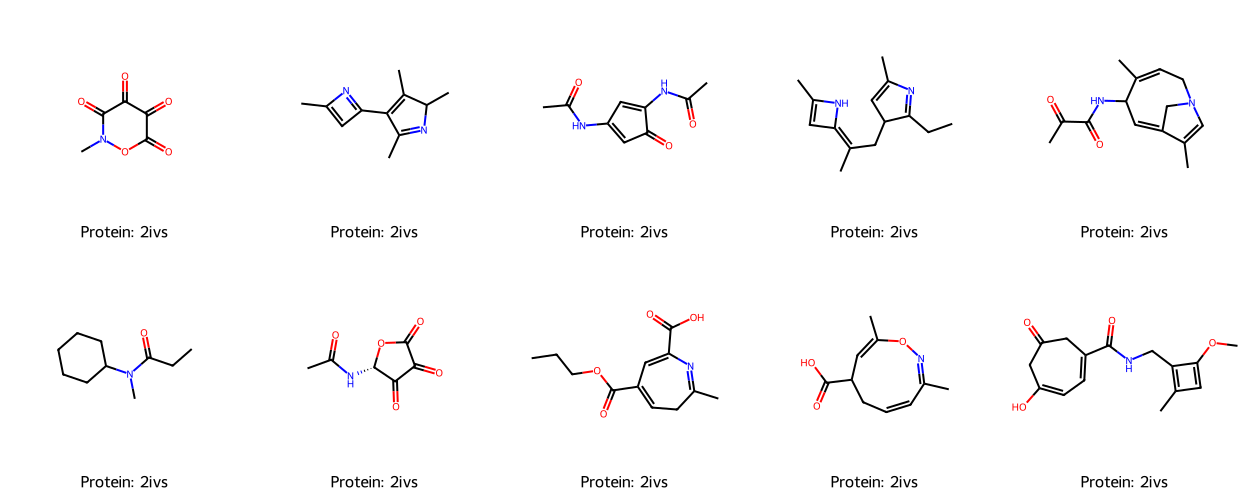


--- Top Molecules for Site Type: cryptic site ---


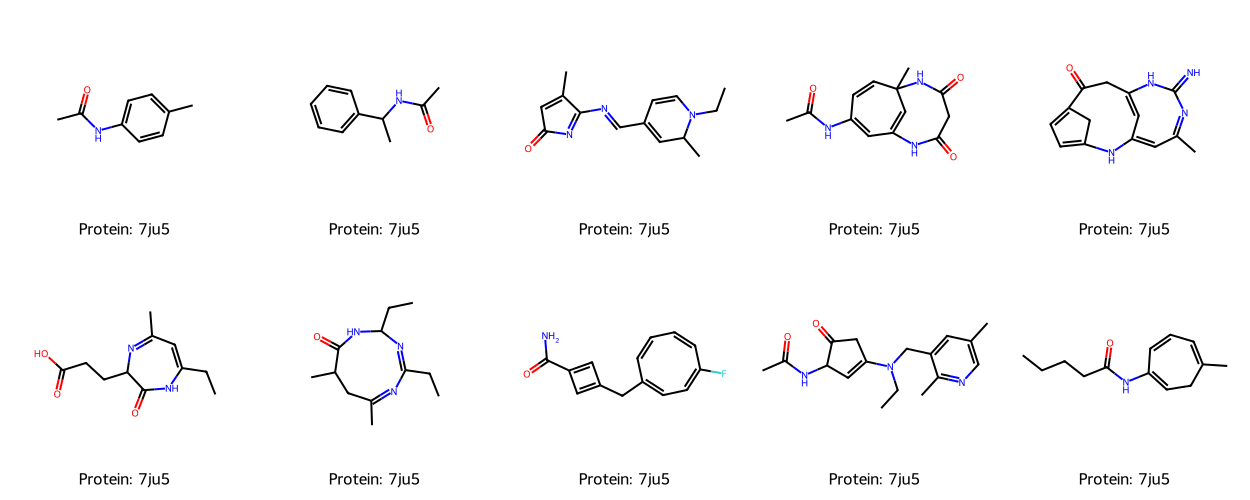

In [18]:
# Plot the grid of SMILES for each site type
plot_top_smiles_grid(top_sites_df)

#CDK2

In [19]:
df_csv = pd.read_csv('/content/drive/MyDrive/Binder_Generation/protein_pocket_analysis/generated_smiles/tensorDTI_out/all_models_merged.csv')

In [20]:
# Get the top 10 confident binding sites for each type
top_sites_df = select_top_10_confident_binding_sites(df_csv)
top_sites_df

,protein_id,pocket_id,valid_x,smiles_x,protein_name_x,site_type_x,drug_id,score_x,SMPBind,conf_x,...,score_y,Plinder,conf_y,valid,smiles,protein_name,site_type,score,BindingDB,vote_sum
0,3fwq,3fwq,1,CN1C(=O)C(=O)C(=O)NC(C)=C1,CDK2,active site,3fwq_51,0.010555,0,0.524729,...,0.057835,0,0.113953,1,CN1C(=O)C(=O)C(=O)NC(C)=C1,CDK2,active site,0.000025,0,0
1,3fwq,3fwq,1,CCC1=NC=C(CC(C)=O)C(C)=C1,CDK2,active site,3fwq_58,0.006254,0,0.519936,...,0.420490,0,0.478632,1,CCC1=NC=C(CC(C)=O)C(C)=C1,CDK2,active site,0.000077,0,0
2,3fwq,3fwq,1,C[C@@H](N=O)[C@H](C)C(=O)NC(=O)C(=O)O,CDK2,active site,3fwq_64,0.050727,0,0.518669,...,0.015835,0,0.065187,1,C[C@@H](N=O)[C@H](C)C(=O)NC(=O)C(=O)O,CDK2,active site,0.034923,0,0
3,3fwq,3fwq,1,CN1C=C(NC(=O)C(C)C(=O)C(C)=O)C1,CDK2,active site,3fwq_56,0.013273,0,0.517822,...,0.061305,0,0.125517,1,CN1C=C(NC(=O)C(C)C(=O)C(C)=O)C1,CDK2,active site,0.613903,1,1
4,3fwq,3fwq,1,N#C[C@H](C)C1=NC(CO)C(=O)N1,CDK2,active site,3fwq_62,0.056985,0,0.517188,...,0.157078,0,0.261560,1,N#C[C@H](C)C1=NC(CO)C(=O)N1,CDK2,active site,0.063418,0,0
5,3fwq,3fwq,1,CC1=NC(CC(=O)O)=C(C)NC(C)=C1O,CDK2,active site,3fwq_63,0.033504,0,0.516782,...,0.010991,0,0.055435,1,CC1=NC(CC(=O)O)=C(C)NC(C)=C1O,CDK2,active site,0.744020,1,1
6,3fwq,3fwq,1,CC1=CC(C)OC(=C)C(C)=S1,CDK2,active site,3fwq_67,0.029911,0,0.516128,...,0.122724,0,0.172063,1,CC1=CC(C)OC(=C)C(C)=S1,CDK2,active site,0.110651,0,0
7,3fwq,3fwq,1,CCCC(=O)CC1=C(C)N=C(C)CC=C1,CDK2,active site,3fwq_44,0.014831,0,0.515250,...,0.347656,0,0.420363,1,CCCC(=O)CC1=C(C)N=C(C)CC=C1,CDK2,active site,0.119645,0,0
8,3fwq,3fwq,1,CC(=O)NCCCC[C@H](C)C(C)=O,CDK2,active site,3fwq_71,0.029527,0,0.513352,...,0.262012,0,0.333365,1,CC(=O)NCCCC[C@H](C)C(C)=O,CDK2,active site,0.000285,0,0
9,3fwq,3fwq,1,CC(C)CCC1=NC(C)C=C(C)C=C1,CDK2,active site,3fwq_35,0.023085,0,0.513318,...,0.138167,0,0.151874,1,CC(C)CCC1=NC(C)C=C(C)C=C1,CDK2,active site,0.071282,0,0



--- Top Molecules for Site Type: active site ---


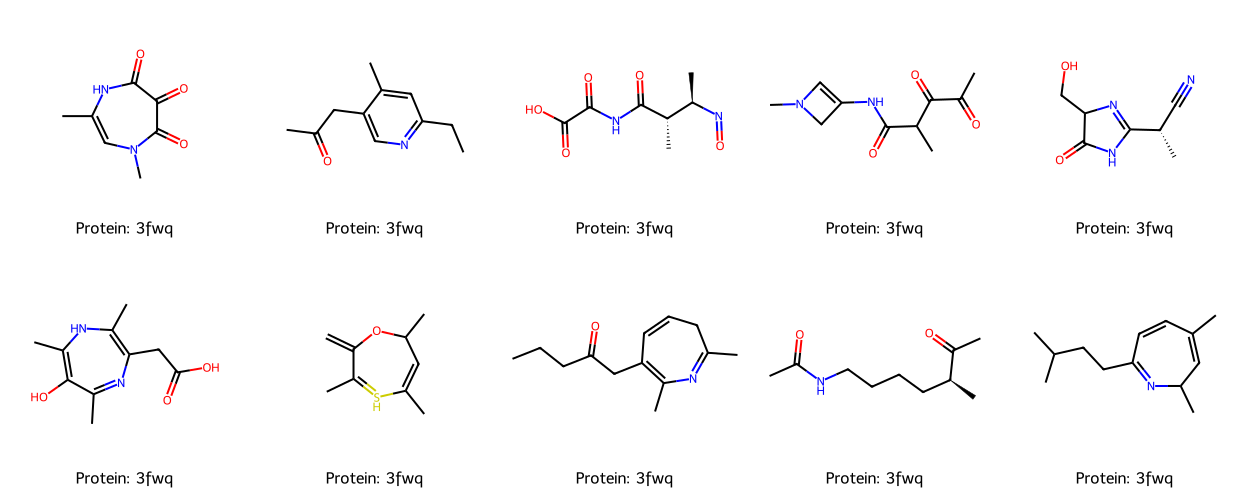


--- Top Molecules for Site Type: cryptic site ---


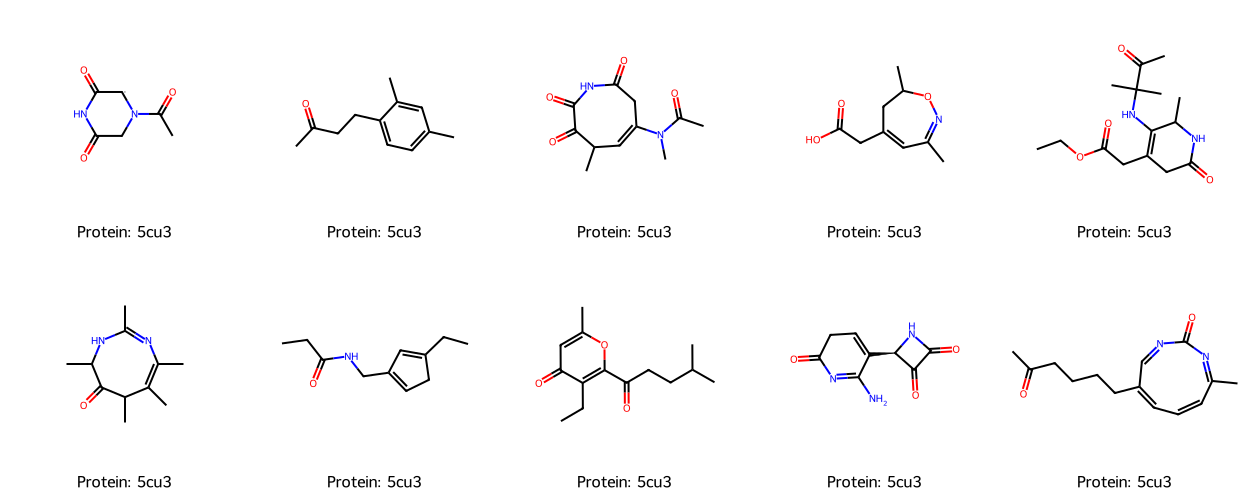

In [21]:
# Plot the grid of SMILES for each site type
plot_top_smiles_grid(top_sites_df)